# Instagram Reach Analysis using Python

## Initialising packages and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [2]:
data = pd.read_csv('instagram data.csv', encoding='latin')
data.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


---

## Preparing

In [3]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [5]:
data.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


In [6]:
data.describe(include="object")

,Caption,Hashtags
count,119,119
unique,90,54
top,Here are some of the best websites that you ca...,#data #datascience #dataanalysis #dataanalytic...
freq,3,19


## Exploration

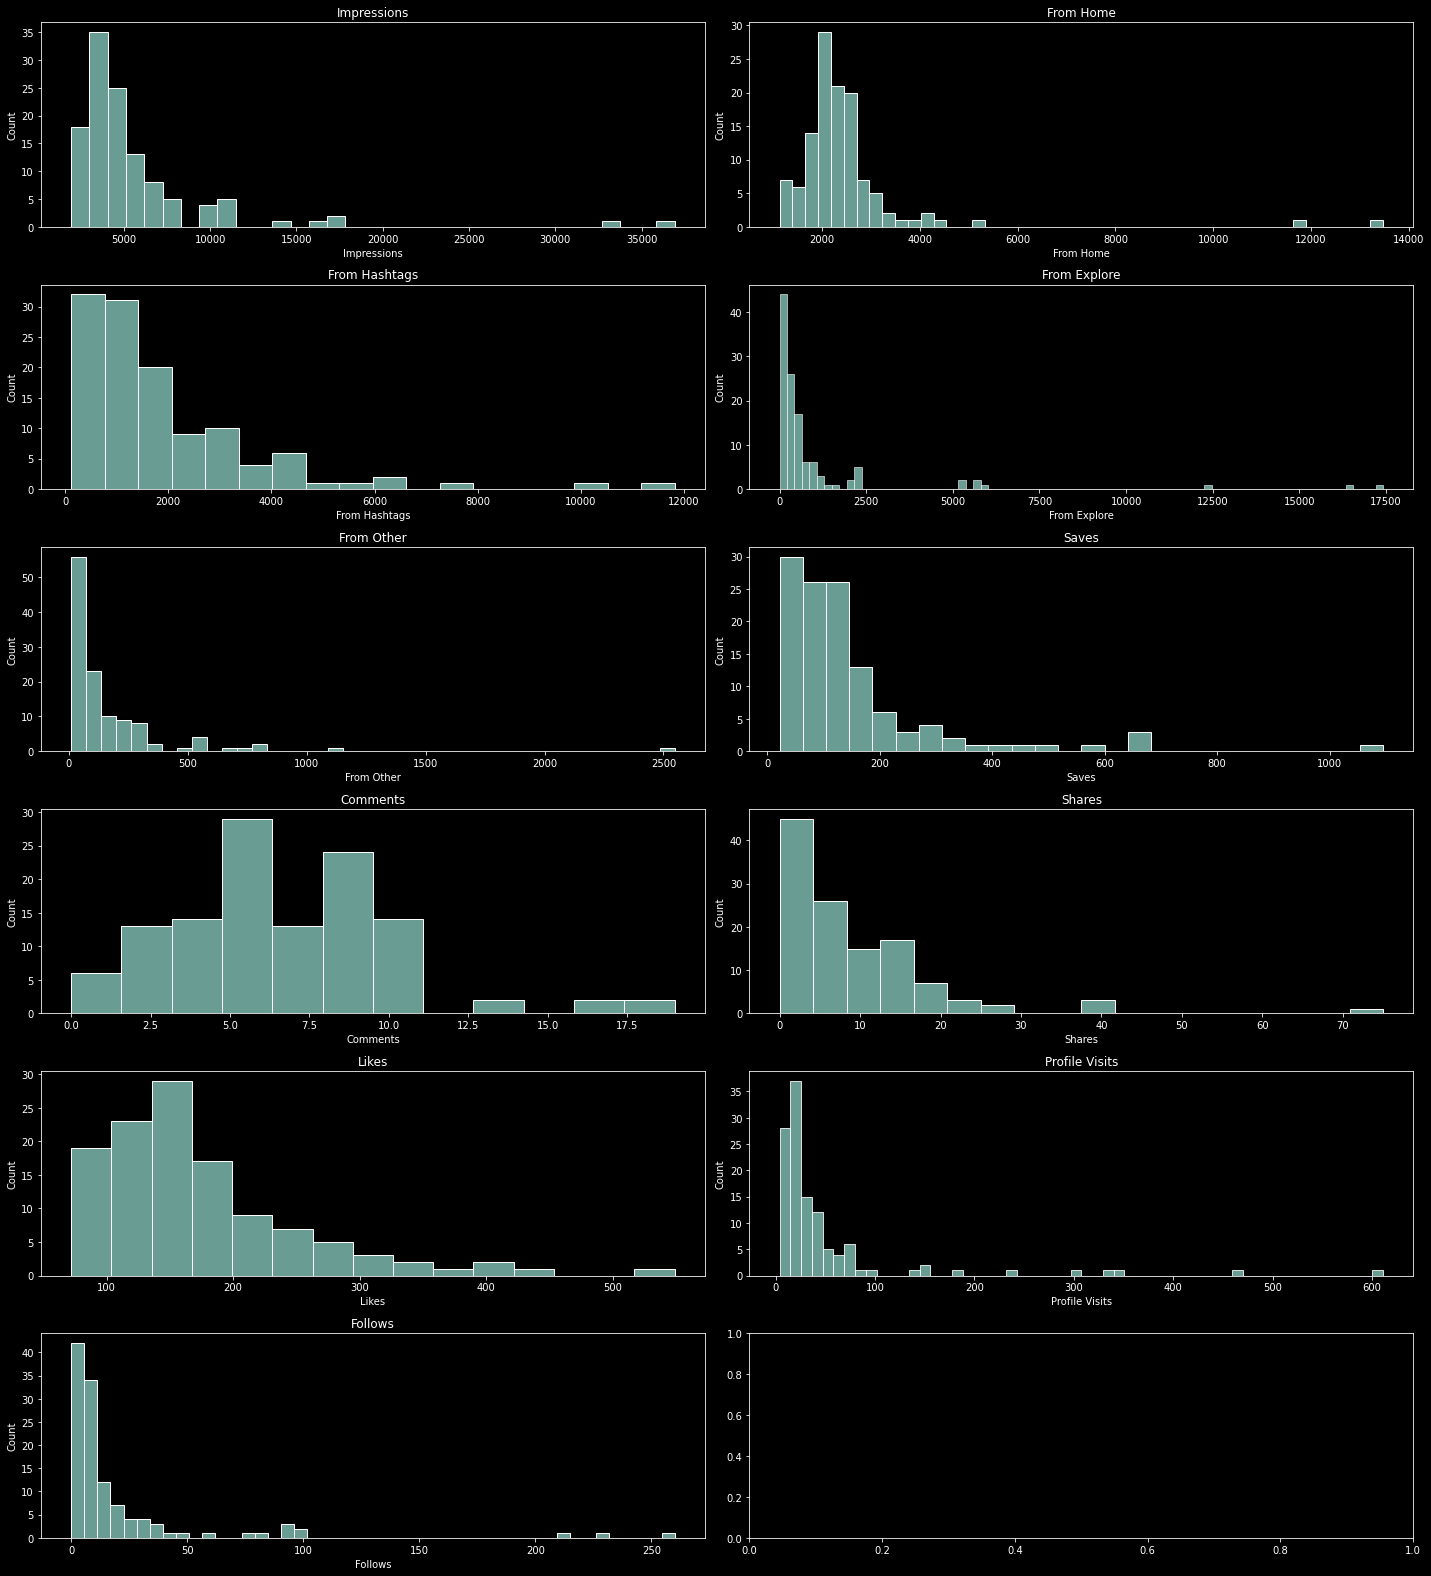

In [7]:
plt.style.use('dark_background')
plt.subplots(nrows=6, ncols=2, figsize=(20, 22))

c = ['Impressions', 'From Home', 'From Hashtags', 'From Explore', 'From Other',
                   'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows']

for i, column in enumerate(c, start=1):
    plt.subplot(6, 2, i)
    if column in data.columns:  # Check if column exists in the dataset
        sns.histplot(data[column])
        plt.title(column)

plt.tight_layout()
plt.show()

In [8]:
values = [
    data["From Home"].sum(),
    data["From Hashtags"].sum(),
    data["From Explore"].sum(),
    data["From Other"].sum()
]
names = ['From Home','From Hashtags','From Explore','Other']
px.pie(values=values, names=names, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)

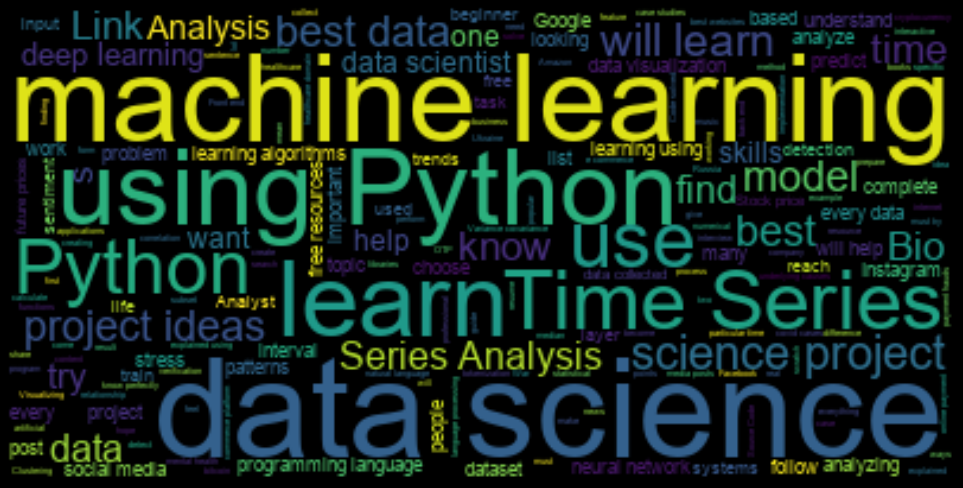

In [9]:
text = " ".join(i for i in data.Caption)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="black", font_path="./arial.ttf").generate(text)
plt.figure( figsize=(17,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

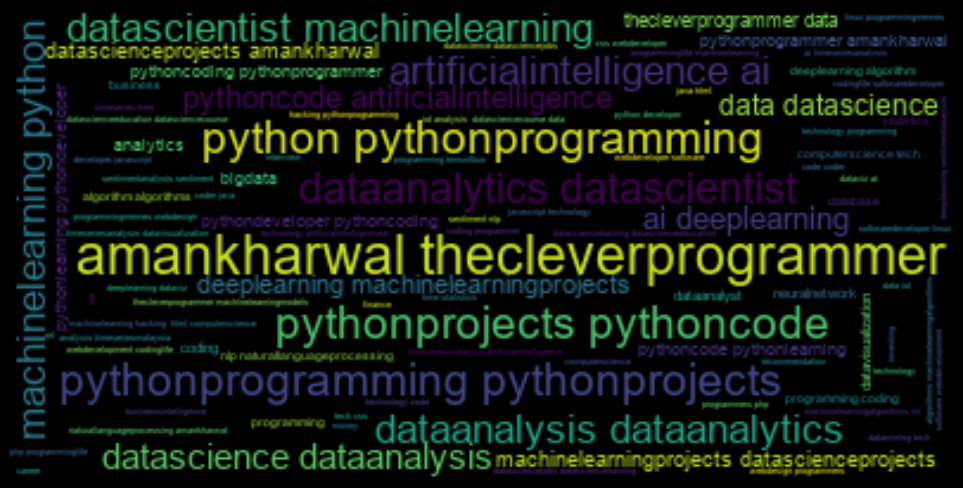

In [10]:
text = " ".join(i for i in data.Hashtags)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="black", font_path="./arial.ttf").generate(text)
plt.figure( figsize=(17,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

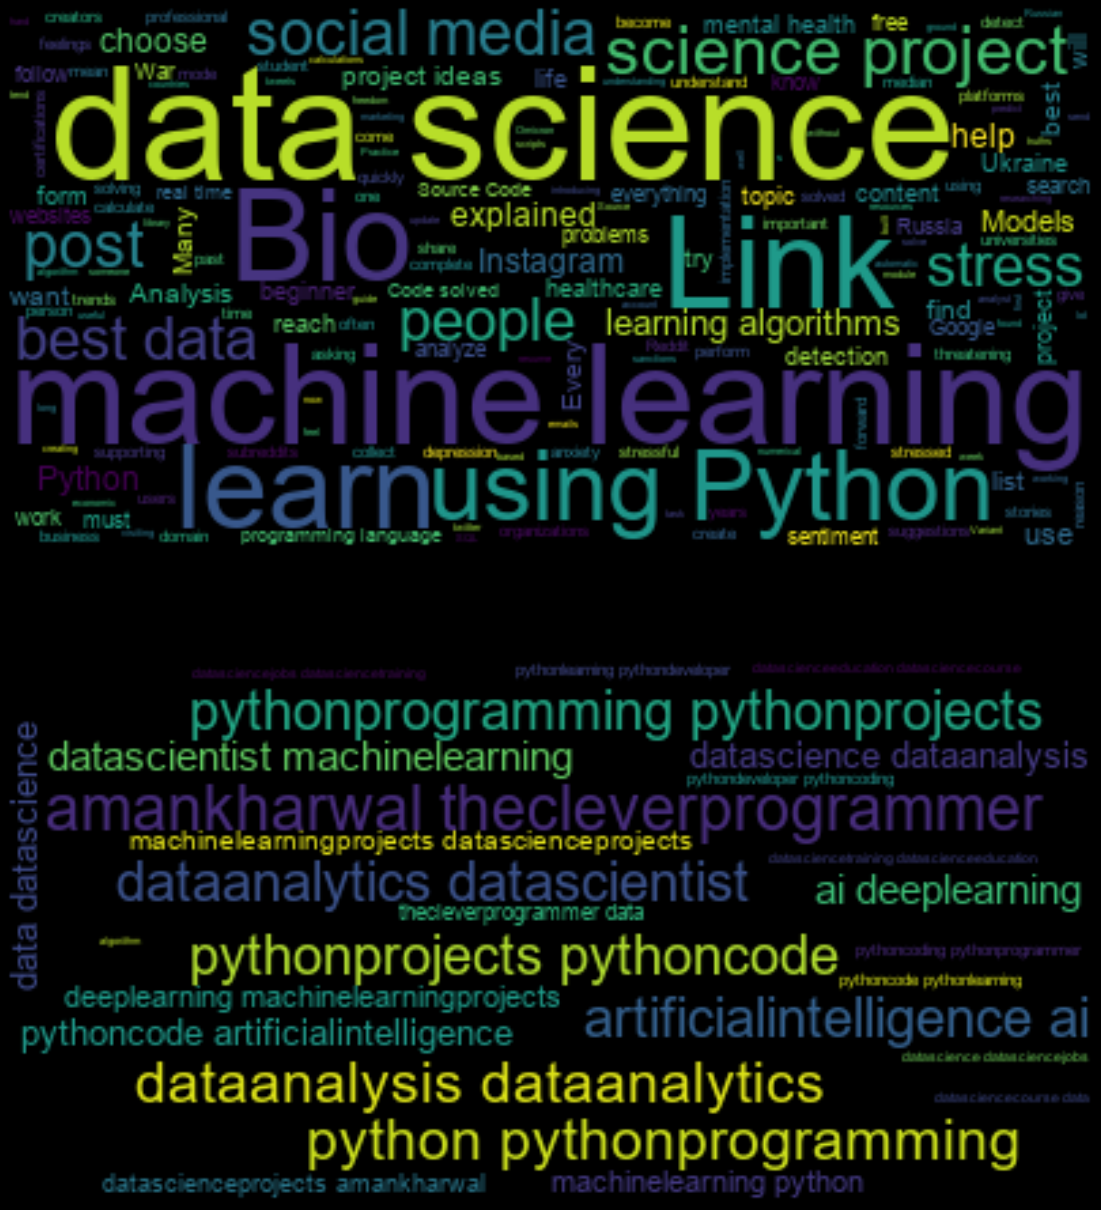

In [11]:
tem = data[data.Impressions >= np.percentile(data.Impressions, 75)]

plt.subplots(nrows=2, ncols=1, figsize=(20, 22))

plt.subplot(2, 1, 1)
text = " ".join(i for i in tem.Caption)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="black", font_path="./arial.ttf").generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.subplot(2, 1, 2)
text = " ".join(i for i in tem.Hashtags)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="black", font_path="./arial.ttf").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

## Analyzing Relationships

In [12]:
px.scatter(data, x="Impressions", y="Likes", size="Likes", trendline='ols')
# Number of likes affect its reach

In [13]:
px.scatter(data, x="Impressions", y="Comments", size="Comments", trendline='ols')
# # Number of comments does not affect its reach much

In [14]:
data.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


In [15]:
px.scatter(data, x="Impressions", y="Shares", size="Shares", trendline='ols')
# There is an evidence in their relationship

In [16]:
px.scatter(data, x="Impressions", y="Saves", size="Saves", trendline='ols')
# There is an evidence in their relationship

<AxesSubplot:>

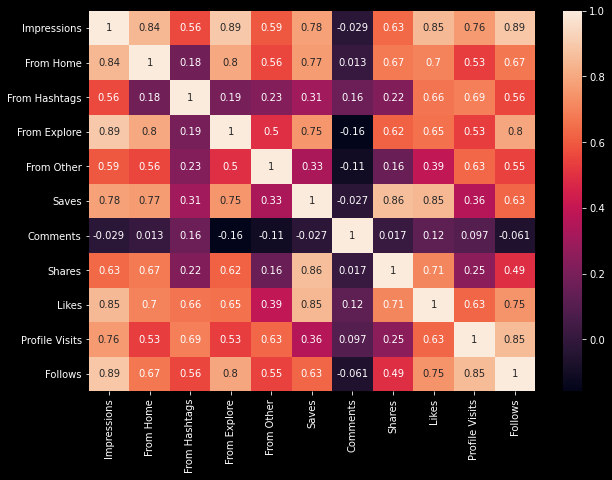

In [17]:
plt.figure(figsize=(10,7))
sns.heatmap(data[c].corr(), annot=True)

For impressions:
- The main source of getting reachs are from no. Likes, Follows, and from hashtag section.
- Given the context of sharing a social media post and on the graph, a high number of shares can make a post gain more views, a low number of shares will not affect much to the reach either since it is not the main source of getting views.
- People who like or share the video are more likely to save it and watch it again sometimes.

## Analyzing Conversion Rate

In [18]:
# Conversion Rate: how many followers you are getting from the number of profile visits from a post
convert = data.Follows / data["Profile Visits"]
convert.describe()

count    119.000000
mean       0.381852
std        0.329570
min        0.000000
25%        0.190476
50%        0.315789
75%        0.461538
max        2.181818
dtype: float64

In [19]:
data.Follows.sum() / data["Profile Visits"].sum()

0.4100265604249668

In [20]:
px.scatter(data, x="Profile Visits", y="Follows", size="Follows", trendline='ols')

In [21]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [95]:
par = PassiveAggressiveRegressor().fit(x_train, y_train)
print(par.score(x_train, y_train), par.score(x_test, y_test))
# Need to take another look at this algorithm

0.8384071678346608 0.9026471907588869


In [31]:
from sklearn.linear_model import LinearRegression
lnr = LinearRegression().fit(x_train, y_train)
print(lnr.score(x_train, y_train), lnr.score(x_test, y_test))

0.8794668724408663 0.8777977785012779
